# Titanic - Machine Learning 

Classification with Logistic Regression and SVM using Titanic Dataset to create a model predicting which passengers survived the shipwreck.

## Import Libraries
We begin by importing essential libraries for data analysis, visualization, and machine learning. These include pandas for data manipulation, seaborn and matplotlib for visualizations, and scikit-learn for machine learning models like Logistic Regression and SVM.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC

## The Data
We read the Titanic dataset, which contains information about passengers, including whether they survived or not. Our target is to predict survival based on various features.

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

## Missing Data
Visualizing Missing Data: The heatmap below helps to quickly identify missing values in our dataset, particularly in the 'Age' and 'Cabin' columns.

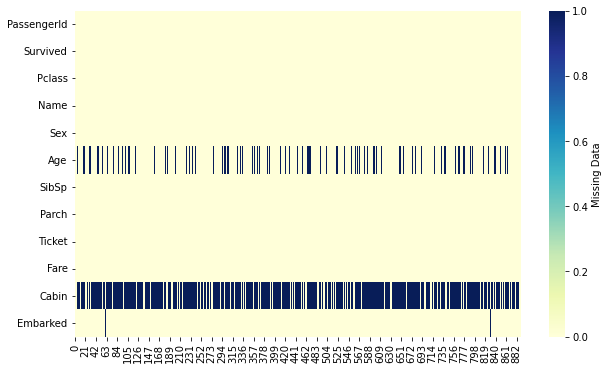

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

Target Variable Distribution: We plot the distribution of the target variable ('Survived') to get an initial idea of the survival rates.

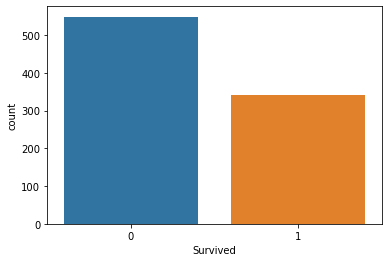

In [4]:
hist = sns.countplot(x="Survived", data=df)

Survival by Gender: This plot breaks down survival rates by gender, highlighting that females had a higher survival rate compared to males.

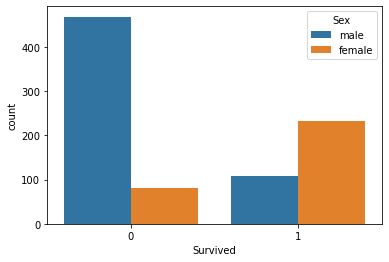

In [5]:
hist = sns.countplot(x="Survived", hue="Sex", data=df)

Passenger Class Distribution: We visualize the distribution of the passengers across different classes ('Pclass') to explore how class might affect survival.

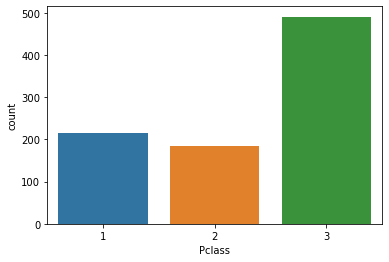

In [6]:
hist = sns.countplot(x="Pclass", data=df)

## Data Cleaning

Handling Missing Data: Since 'Age' has missing values, we fill these with the mean age. The 'Cabin' column is dropped due to excessive missing data, and we remove rows where the 'Embarked' feature is missing.

In [7]:
#missing age filled with average
Mean=df["Age"].mean()
df["Age"]=df["Age"].fillna(Mean)

#dropping Cabin, Name and Ticket
df.drop(columns=["Cabin", "Name", "Ticket"], inplace=True)

#deleting NA rows
df = df[df["Embarked"].notna()]
df.dropna(inplace=True)

## Converting Categorical Features 

Encoding Categorical Features: We convert categorical columns such as 'Sex' and 'Embarked' into numerical values using one-hot encoding, ensuring we don’t introduce multicollinearity by dropping the first category.

In [8]:
df= pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building the Logistic Regression Model:

Feature Scaling and Train-Test Split: Before training the model, we scale the features to standardize them. Then, we split the data into training and testing sets (80-20 split).

In [9]:
scale = StandardScaler()
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

#normalization
X.iloc[:,0:-1] = scale.fit_transform(X.iloc[:,0:-1].to_numpy())
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


Training the Logistic Regression Model: We train a Logistic Regression model and evaluate its accuracy on the test set.

In [10]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)
model.score(X_test, y_test)

0.8539325842696629

## Evaluation

Evaluating the Logistic Regression Model: We calculate key performance metrics like precision, recall, and F1-score to evaluate the quality of the model's predictions.

In [11]:
y = model.predict(X_test)
f1_score = precision_recall_fscore_support(y_test, y ,average="micro")
print("Precision:", round(f1_score[0], 3), " ", "Recall:", round(f1_score[1], 3)," ", "f1-score:", round(f1_score[2], 3))

Precision: 0.854   Recall: 0.854   f1-score: 0.854


# Support Vector Machines

We also build an SVM model using an RBF kernel and compare its performance to Logistic Regression.

In [12]:
svc = SVC(C=1, kernel='rbf', gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8651685393258427

## Hyperparameter Tuning with GridSearchCV:
To fine-tune the SVM model, we use GridSearchCV to find the optimal values for 'C' and 'gamma' parameters.

In [13]:
param = {'C':[1, 6.5, 10], 'gamma':('scale', 'auto')}
s = SVC()
a = GridSearchCV(svc, param)
a.fit(X_train, y_train)
print("Ideal performance was obtained with parameters:- \n", a.cv_results_['params'][list(a.cv_results_['rank_test_score']).index(1)])

Ideal performance was obtained with parameters:- 
 {'C': 1, 'gamma': 'auto'}


## Final Evaluation:

We evaluate the SVM model again after applying the best parameters and compare it to Logistic Regression based on precision, recall, and F1-score.

In [14]:
y1 = svc.predict(X_test)
f1_score = precision_recall_fscore_support(y_test, y1 ,average="micro")
print("Precision:", round(f1_score[0], 3), " ", "Recall:", round(f1_score[1], 3)," ", "f1-score:", round(f1_score[2], 3))

Precision: 0.865   Recall: 0.865   f1-score: 0.865


## Model Comparison:

* Logistic Regression produced an accuracy of **85.4%** with balanced precision, recall, and F1-score.
* The SVM model, after tuning, slightly outperformed Logistic Regression with **86.5%** accuracy.

Conclusion: While Logistic Regression is effective due to its interpretability and ability to predict binary outcomes, the SVM model with an RBF kernel delivered higher accuracy after hyperparameter tuning. The RBF kernel's ability to handle non-linear relationships contributed to its superior performance.